# Compare transient forcing estimates to fixed-SST forcing

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
directory = '../Estimates/piClim-histall_forcing/'
file_list = [ f.name for f in os.scandir(directory) if f.name !='.ipynb_checkpoints']
model_list = [file.rsplit('_')[0] for file in file_list]
models = np.unique(model_list).tolist()
file_list

['CanESM5_r3i1p2f1_transientERF.csv',
 'GFDL-CM4_r3i1p1f1_transientERF.csv',
 'MIROC6_r3i1p1f1_transientERF.csv',
 'CNRM-CM6-1_r1i1p1f2_transientERF.csv',
 'GISS-E2-1-G_r1i1p1f2_transientERF.csv',
 'GFDL-CM4_r1i1p1f1_transientERF.csv',
 'MIROC6_r2i1p1f1_transientERF.csv',
 'CanESM5_r1i1p2f1_transientERF.csv',
 'GFDL-CM4_r2i1p1f1_transientERF.csv',
 'MIROC6_r1i1p1f1_transientERF.csv',
 'CanESM5_r2i1p2f1_transientERF.csv',
 'IPSL-CM6A-LR_r3i1p1f1_transientERF.csv',
 'NorESM2-LM_r2i1p2f1_transientERF.csv',
 'HadGEM3-GC31-LL_r2i1p1f3_transientERF.csv',
 'NorESM2-LM_r1i1p1f1_transientERF.csv',
 'NorESM2-LM_r1i1p2f1_transientERF.csv',
 'NorESM2-LM_r2i1p1f1_transientERF.csv',
 'HadGEM3-GC31-LL_r1i1p1f3_transientERF.csv',
 'NorESM2-LM_r3i1p1f1_transientERF.csv',
 'IPSL-CM6A-LR_r1i1p1f1_transientERF.csv',
 'HadGEM3-GC31-LL_r3i1p1f3_transientERF.csv',
 'GISS-E2-1-G_r1i1p1f1_transientERF.csv',
 'GISS-E2-1-G_r1i1p3f2_transientERF.csv',
 'NorESM2-LM_r3i1p2f1_transientERF.csv',
 'IPSL-CM6A-LR_r2i1p1

In [4]:
models

['CNRM-CM6-1',
 'CanESM5',
 'EC-Earth3',
 'GFDL-CM4',
 'GISS-E2-1-G',
 'HadGEM3-GC31-LL',
 'IPSL-CM6A-LR',
 'MIROC6',
 'NorESM2-LM']

CNRM-CM6-1
CanESM5
EC-Earth3
GFDL-CM4
GISS-E2-1-G
HadGEM3-GC31-LL
IPSL-CM6A-LR
MIROC6
NorESM2-LM


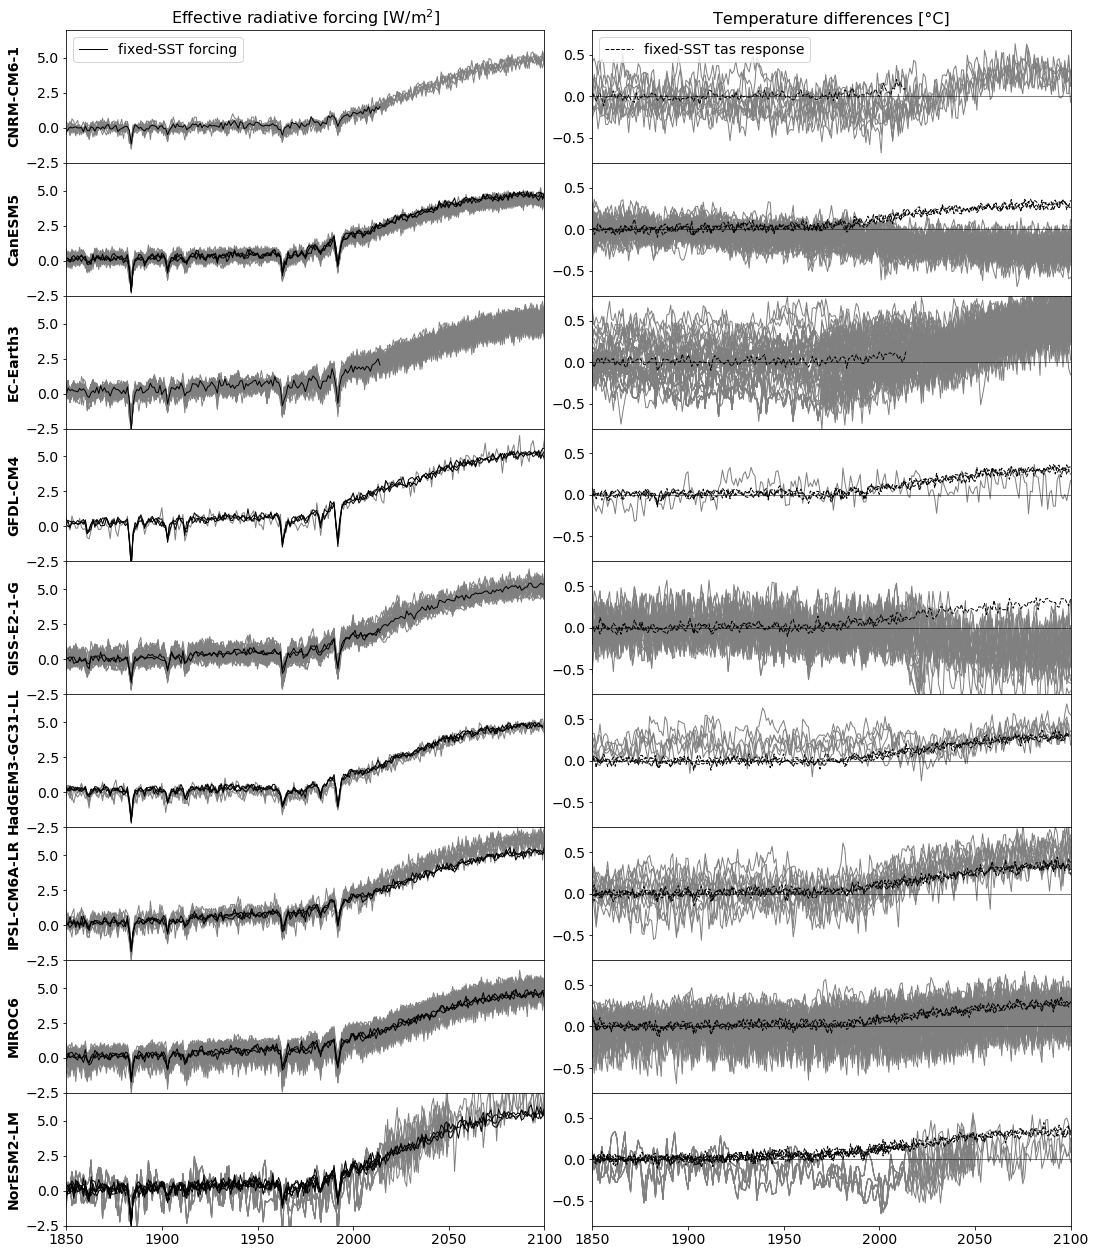

In [18]:
npanels = len(models)
# make figure
fig = plt.figure(figsize = [18,22]);
plt.subplots_adjust(hspace=0.0, wspace = 0.1)
outer = gridspec.GridSpec(npanels, 1) 

for (k, model) in enumerate(models):
#for (k,model) in enumerate([models[5]]):
    print(model)
    # for each row in outer gridspec, plot results for model:
    gs_k = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[k], hspace = 0.1)
    f_plot = fig.add_subplot(gs_k[0])
    t_plot = fig.add_subplot(gs_k[1])
    
    f_plot.set_xlim(1850,2100); f_plot.set_ylim(-2.5,7.0)
    t_plot.set_xlim(1850,2100); t_plot.set_ylim(-0.8,0.8)
    f_plot.tick_params(axis='both',labelsize=14); t_plot.tick_params(axis='both',labelsize=14)  
    #f_plot.text(0.05, 0.8, model, fontsize=14, transform=f_plot.transAxes)
    f_plot.set_ylabel(model, fontsize=14, fontweight = 'bold')
    t_plot.axhline(0, color='k', linewidth = 0.5) # horizontal lines
    
    if k == 0:
        f_plot.set_title('Effective radiative forcing [W/m$^2$]', fontsize = 16)
        t_plot.set_title('Temperature differences [°C]', fontsize = 16)
    if k < npanels - 1:
        f_plot.axes.xaxis.set_visible(False)
        t_plot.axes.xaxis.set_visible(False)

    
    # load fixed-SST forcing and plot it:
    files_to_use = [file for file in file_list if file.rsplit('_')[0] == model]
    if 'GISS-E2-1-G_r1i1p3f2_transientERF.csv' in files_to_use:
        files_to_use.remove('GISS-E2-1-G_r1i1p3f2_transientERF.csv')
    for (fi, file) in enumerate(files_to_use):
        data = pd.read_csv(directory + file, index_col=0)
        f_plot.plot(data['ERF'], color = 'black', linewidth = 1,label = 'fixed-SST forcing', zorder=2)
        if fi == 0 and k == 0:
            #f_plot.legend(fontsize=14, loc = 'lower right')
            f_plot.legend(fontsize=14, loc = 'upper left')
            
    #load my forcing estimates and plot them:
    filedir = '../Estimates/Transient_forcing_estimates/' + model + '/ssp245/'
    filesindir = [f.name for f in os.scandir(filedir) if f.name !='.ipynb_checkpoints']
    files_to_use_ERF = [file for file in filesindir if file.rsplit('_')[1][-6:] == 'ssp245' and file.rsplit('_')[3] == 'ERF.csv']
    for file in files_to_use_ERF:
        data = pd.read_csv(filedir + file, index_col=0)
        f_plot.plot(data['ERF'], color = 'gray', linewidth = 1, zorder=1)
    
    # plot temperature response in fixed-SST run
    directory_tas = '../Estimates/piClim-histall_tasresponse/'
    file_list_tas = [ f.name for f in os.scandir(directory_tas) if f.name !='.ipynb_checkpoints']
    files_to_use_tas = [file for file in file_list_tas if file.rsplit('_')[0] == model]
    if 'GISS-E2-1-G_r1i1p3f2_tas_response.csv' in files_to_use_tas:
        files_to_use_tas.remove('GISS-E2-1-G_r1i1p3f2_tas_response.csv')
    for (fi, file) in enumerate(files_to_use_tas):
        data = pd.read_csv(directory_tas + file, index_col=0)
        t_plot.plot(data['tas'], '--', color = 'black', linewidth = 1, label= 'fixed-SST tas response', zorder=2)
        if fi == 0 and k == 0:
            t_plot.legend(fontsize=14, loc = 'upper left')
    
    # plot temperature deviation between linear model and coupled model
    files_to_use_tas = [file for file in filesindir if file.rsplit('_')[1][-6:] == 'ssp245' and file.rsplit('_')[3] == 'tas']
    for file in files_to_use_tas:
        data = pd.read_csv(filedir + file, index_col=0)
        t_plot.plot(data['tas_diff'], color = 'gray', linewidth = 1, zorder=1)    
    
plt.savefig('../Figures/transient_forcing_comparison.pdf', format='pdf', dpi=600, bbox_inches="tight")
    